## <p style="font-family:newtimeroman;font-size:150%;text-align:center;">Classification of Sperm Abnormality with EfficientNetV2 Method and Dynamic Color Image Processing <br>EfficientNetv2s, Xception, ResNet50</p>

# <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">Introduction</p>

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">TABLE OF CONTENTS</p>   
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. DATA PREPRATION](#2)
    
* [2. TRANSFER LEARNING](#3)
    
* [3. EfficientNetB0](#4)
    
* [4. ResNet101](#5)   
      
* [6. Xception](#6)
    
* [7. CONCLUSION](#7)

<a id="1"></a>
# <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">Importing Libraries</p>

In [ ]:
!pip install mplcyberpunk

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use("cyberpunk")
import cv2
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling2D,GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
from tqdm import tqdm

#from warnings import filterwarnings
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id="2"></a>
# <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">Data Preperation</p>

In [ ]:
import os

input_path = r"/content/drive/MyDrive/sperm analisis/DatasetSperm"
print("Isi folder input:", os.listdir(input_path))


Isi folder input: ['Training', 'Testing']


In [ ]:
# Periksa isi folder Training
train_path = os.path.join(input_path, 'Training')
print("Isi folder Training:", os.listdir(train_path))

# Periksa isi folder Testing
test_path = os.path.join(input_path, 'Testing')
print("Isi folder Testing:", os.listdir(test_path))


Isi folder Training: ['Tapered', 'Normal', 'Amorphous', 'Pyriform']
Isi folder Testing: ['Normal', 'Pyriform', 'Tapered', 'Amorphous']


In [ ]:
train_path = r"/content/drive/MyDrive/sperm analisis/DatasetSperm/Training"
test_path = r"/content/drive/MyDrive/sperm analisis/DatasetSperm/Testing"

print("Isi folder Training:", os.listdir(train_path))
print("Isi folder Testing:", os.listdir(test_path))


Isi folder Training: ['Tapered', 'Normal', 'Amorphous', 'Pyriform']
Isi folder Testing: ['Normal', 'Pyriform', 'Tapered', 'Amorphous']


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Inisialisasi
X_train = []
y_train = []
labels = ['Normal', 'Pyriform', 'Tapered', 'Amorphous']

image_size = 150

# Load data training
for i in labels:
    folderPath = os.path.join(r'/content/drive/MyDrive/sperm analisis/DatasetSperm/Training', i)
    if not os.path.exists(folderPath):
        print(f"Folder tidak ditemukan: {folderPath}")
        continue
    for j in tqdm(os.listdir(folderPath), desc=f"Memproses {i} di Training"):
        img_path = os.path.join(folderPath, j)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            X_train.append(img)
            y_train.append(i)
        else:
            print(f"Error membaca gambar: {img_path}")

# Load data testing
for i in labels:
    folderPath = os.path.join(r'/content/drive/MyDrive/sperm analisis/DatasetSperm/Testing', i)
    if not os.path.exists(folderPath):
        print(f"Folder tidak ditemukan: {folderPath}")
        continue
    for j in tqdm(os.listdir(folderPath), desc=f"Memproses {i} di Testing"):
        img_path = os.path.join(folderPath, j)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            X_train.append(img)
            y_train.append(i)
        else:
            print(f"Error membaca gambar: {img_path}")

# Konversi ke array numpy
X_train = np.array(X_train)
y_train = np.array(y_train)

print(f"Shape X_train: {X_train.shape}, y_train: {y_train.shape}")


Memproses Amorphous di Testing: 100%|██████████| 52/52 [00:12<00:00,  4.11it/s]

Shape X_train: (432, 150, 150, 3), y_train: (432,)


## Data visualization

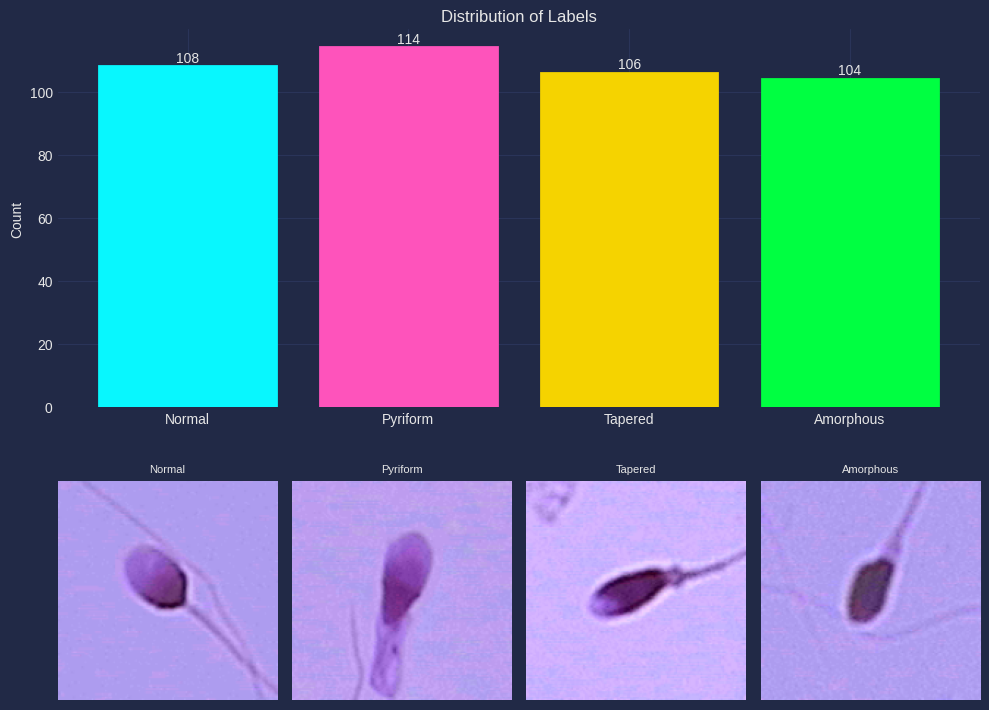

In [ ]:
# Hitung jumlah label
label_counts = {label: np.sum(y_train == label) for label in labels}

# Ukuran figure
plt.figure(figsize=(10, 8))

# Warna dasar untuk gradien
colors = ["C0", "C1", "C2", "C3"]

# Bagian histogram
plt.subplot(2, 1, 1)
bars = plt.bar(label_counts.keys(), label_counts.values(), color=colors)

# Tambahkan efek gradien secara manual dan keterangan jumlah
for bar, color in zip(bars, colors):
    bar.set_edgecolor(color)
    bar.set_linewidth(2)
    # Tambahkan nilai di atas bar
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.5,  # Posisi sedikit di atas batang
             str(int(bar.get_height())),  # Tampilkan nilai dalam bentuk string
             ha='center', va='bottom', fontsize=10)

plt.ylabel('Count')
plt.title('Distribution of Labels')

# Bagian gambar sampel
k = 0
for i, label in enumerate(labels):
    # Cari gambar pertama dari label tersebut
    for j in range(len(y_train)):
        if y_train[j] == label:
            plt.subplot(2, 4, k + 5)
            plt.imshow(X_train[j].astype('uint8'))  # Pastikan gambar dalam format uint8 untuk plt.imshow
            plt.axis('off')
            plt.title(label, fontsize=8)
            k += 1
            break

plt.tight_layout()
plt.show()


**1. Normal
Definisi:
Sperma dengan bentuk dan struktur ideal yang dianggap optimal untuk fertilisasi. Ciri-ciri utama:**

Kepala: Oval sempurna, simetris, dan berukuran sekitar 5-6 μm panjang dan 2.5-3.5 μm lebar.
Leher: Harus lurus, tidak bengkok, dan terhubung langsung ke kepala tanpa penyimpangan.
Ekor: Panjang, lurus, dan berfungsi untuk memberikan gerakan maju yang efisien.


**2. Tapered (Menyempit)
Definisi:
Sperma yang memiliki kepala yang meruncing, mirip dengan bentuk peluru atau panah.**

Kepala: Menyempit di bagian puncak, dengan area akrosom yang kecil atau tidak proporsional.
Leher/Ekor: Umumnya normal, tetapi efisiensi bergerak berkurang.
Penyebab Kemungkinan:



**3. Pyriform (Seperti Pir)
Definisi:
Sperma dengan kepala berbentuk seperti buah pir, yaitu melebar di dasar dan mengecil di puncaknya.**

Kepala: Tidak simetris, dengan ukuran akrosom yang terlalu besar atau kecil.
Leher/Ekor: Biasanya terganggu akibat distribusi massa kepala yang tidak proporsional.

**4. Amorphous (Tidak Beraturan)
Definisi:
Sperma dengan kepala yang bentuknya tidak terdefinisi atau tidak menyerupai struktur normal.**

Kepala: Asimetris, terlalu besar atau kecil, sering kali dengan deformasi akrosom.
Leher/Ekor: Biasanya disertai kelainan, seperti bengkok atau pecah.

### Dataset Split: Train and Test

In [ ]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

### One-Hot Encoding Labels

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

<a id="3"></a>
# <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">Transfer Learning</p>

<a id="4"></a>
# <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">EfficientNetV2-Small</p>

In [ ]:
# Load EfficientNetV2-Small pretrained on ImageNet without the top layers
efficientnetV2_small = tf.keras.applications.EfficientNetV2S(weights='imagenet',
                                                             include_top=False,
                                                             input_shape=(image_size, image_size, 3))

# Build the custom model on top of the EfficientNetV2-Small base
model = efficientnetV2_small.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dense(1024, activation='relu')(model)
model = tf.keras.layers.Dropout(rate=0.4)(model)
model = tf.keras.layers.Dense(4, activation='softmax')(model)
model = tf.keras.models.Model(inputs=efficientnetV2_small.input, outputs=model)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary (optional)
model.summary()

82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 150, 150, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 75, 75, 24)     │            648 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 75, 75, 24)     │             96 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 75, 75, 24)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, 75, 75, 24)     │          5,184 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, 75, 75, 24)     │             96 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, 75, 75, 24)     │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_add (Add)         │ (None, 75, 75, 24)     │              0 │ block1a_project_activ… │
│                           │                        │                │ stem_activation[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_conv      │ (None, 75, 75, 24)     │          5,184 │ block1a_add[0][0]      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_bn        │ (None, 75, 75, 24)     │             96 │ block1b_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_activati… │ (None, 75, 75, 24)     │              0 │ block1b_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_drop (Dropout)    │ (None, 75, 75, 24)     │              0 │ block1b_project_activ… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_add (Add)         │ (None, 75, 75, 24)     │              0 │ block1b_drop[0][0],    │
│                           │                        │                │ block1a_add[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv  

 Total params: 21,647,204 (82.58 MB)

 Trainable params: 21,493,332 (81.99 MB)

 Non-trainable params: 153,872 (601.06 KB)

In [ ]:
# Tensorboard callback for logging training metrics
tensorboard = TensorBoard(log_dir='logs')

# Modelcheckpoint callback to save the best model
checkpoint = ModelCheckpoint("efficientnetV2S.keras", monitor="val_accuracy",
                             save_best_only=True, verbose=1)

# ReduceLROnPlateau callback to reduce learning rate if validation accuracy plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2,
                              min_delta=0.0001, verbose=1)

In [ ]:
history = model.fit(X_train,y_train,validation_split = 0.1, epochs = 12, verbose = 1,
                    batch_size = 32, callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/12
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.5412 - loss: 1.0750 
Epoch 1: val_accuracy improved from -inf to 0.66667, saving model to efficientnetV2S.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 283s 14s/step - accuracy: 0.5515 - loss: 1.0566 - val_accuracy: 0.6667 - val_loss: 1.1388 - learning_rate: 0.0010
Epoch 2/12
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.9050 - loss: 0.3720 
Epoch 2: val_accuracy improved from 0.66667 to 0.84615, saving model to efficientnetV2S.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 179s 12s/step - accuracy: 0.9033 - loss: 0.3782 - val_accuracy: 0.8462 - val_loss: 0.6905 - learning_rate: 0.0010
Epoch 3/12
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9024 - loss: 0.3100 
Epoch 3: val_accuracy did not improve from 0.84615
11/11 ━━━━━━━━━━━━━━━━━━━━ 135s 12s/step - accuracy: 0.9020 - loss: 0.3116 - val_accuracy: 0.7692 - val_loss: 2.1338 - learning_rate: 0.0010
Epoch 4/12
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9187 - loss: 0.2838 
E

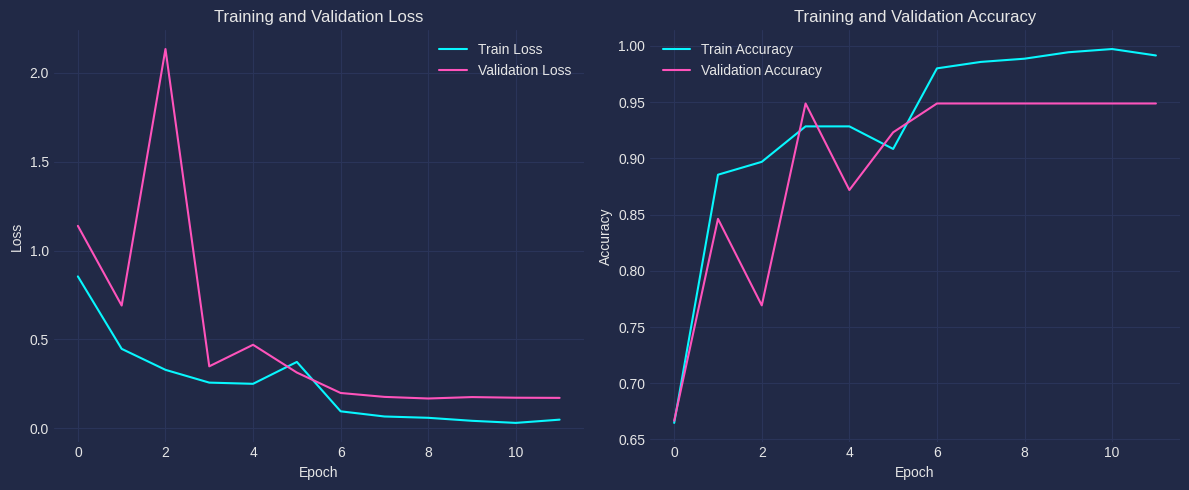

In [ ]:
# Plotting training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

## <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">Evaluation</p>

2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 6s/step


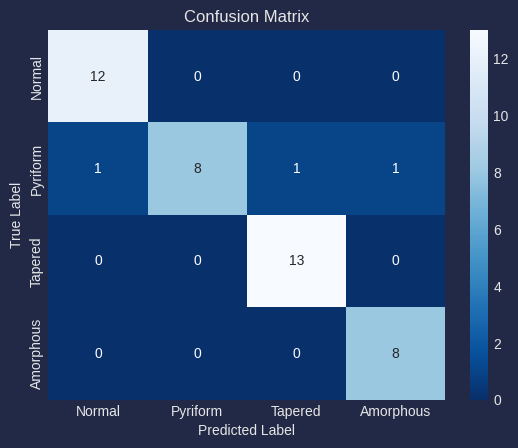

In [ ]:
y_true_test = np.argmax(y_test, axis=1)
y_pred_test = np.argmax(model.predict(X_test), axis=1)

heatmap = sns.heatmap(confusion_matrix(y_true_test,y_pred_test), annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(y_true_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.73      0.84        11
           2       0.93      1.00      0.96        13
           3       0.89      1.00      0.94         8

    accuracy                           0.93        44
   macro avg       0.94      0.93      0.93        44
weighted avg       0.94      0.93      0.93        44



In [ ]:
model.save('EfficientNetV2S_Sperma.h5')  # Simpan model


In [ ]:
# Simpan arsitektur model
json_config = model.to_json()
with open('model_configEfficientNetV2S.json', 'w') as json_file:
    json_file.write(json_config)


In [ ]:
model.save_weights('EfficientNetV2S.weights.h5')  # Simpan bobot model dengan nama yang valid


In [ ]:
model.save('EfficientNetV2S_Sperma.keras')  # Simpan model dalam format .keras


## <p style="background-color:#003166;font-family:newtimeroman;font-size:150%;text-align:center;border-radius:50px 10px;">Prediction</p>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Predicted label: Tapered 
Actual label: Tapered 
Confidence: 96.77%



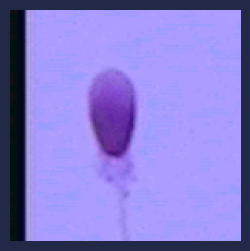

In [ ]:
random_index = np.random.randint(0, len(X_test))
random_img = X_test[random_index]
predictions = model.predict(random_img.reshape(1, 150, 150, 3))  # Reshape and preprocess the image

# Interpret the model's predictions
predicted_class = np.argmax(predictions)  # Get the index of the class with the highest probability
predicted_label = labels[predicted_class]  # Convert class to label
confidence = predictions[0][predicted_class]

actual_index = y_test[random_index]  # Get the one-hot encoded actual class
actual_class = np.argmax(actual_index)
actual_label = labels[actual_class]

# Display the image and prediction information
print(f"\033[94mPredicted label: {predicted_label}\033[0m \n\033[92mActual label: {actual_label}\033[0m \n\033[93mConfidence: {confidence*100:.2f}%\033[0m\n")
plt.figure(figsize = (3,3))
plt.imshow(random_img)
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Predicted label: Normal 
Actual label: Normal 
Confidence: 99.92%



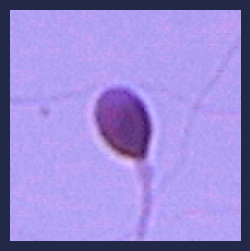

In [ ]:
random_index = np.random.randint(0, len(X_test))
random_img = X_test[random_index]
predictions = model.predict(random_img.reshape(1, 150, 150, 3))  # Reshape and preprocess the image

# Interpret the model's predictions
predicted_class = np.argmax(predictions)  # Get the index of the class with the highest probability
predicted_label = labels[predicted_class]  # Convert class to label
confidence = predictions[0][predicted_class]

actual_index = y_test[random_index]  # Get the one-hot encoded actual class
actual_class = np.argmax(actual_index)
actual_label = labels[actual_class]

# Display the image and prediction information
print(f"\033[94mPredicted label: {predicted_label}\033[0m \n\033[92mActual label: {actual_label}\033[0m \n\033[93mConfidence: {confidence*100:.2f}%\033[0m\n")
plt.figure(figsize = (3,3))
plt.imshow(random_img)
plt.axis('off')
plt.show()